In [ ]:
Data Science Report: Analysis of BA Reviews
    
1. Introduction
This report provides a detailed analysis of the BA reviews dataset. The dataset contains text reviews with indications of whether they are verified or not.

2. Data Overview
The dataset consists of:

An index or identifier for each review.
The text of the review, which includes a label indicating if the review is verified.

3. Data Cleaning & Pre-processing
Duplicate entries were removed.
The verification status was extracted from the review text and placed in a separate column for easier analysis.
The review text was cleaned by removing the verification status, leading to a pure review content column.

4. Exploratory Data Analysis (EDA)
4.1 Verified vs. Not Verified Reviews
A substantial number of the reviews were not verified, as visualized in the bar chart below.

4.1 Verified vs. Not Verified Reviews (Continued)
The visualization above showed the distribution of verified vs. not verified reviews. As observed, a significant portion of the reviews were not verified.

4.2 Review Lengths
On average, review lengths were around 792 characters, with the shortest review being 132 characters and the longest going up to 3,466 characters. Half of the reviews had lengths under 647 characters.

5. Sentiment Analysis
Using TextBlob for sentiment analysis, reviews were classified into three categories based on their sentiment polarity:

Positive
Neutral
Negative
The distribution of sentiments was visualized, revealing that a significant portion of reviews had a positive sentiment, followed by negative and then neutral sentiments.

6. Topic Modelling
Using the LDA (Latent Dirichlet Allocation) method, the reviews were grouped into five main topics. Each topic consisted of a set of words that frequently appeared together in the reviews.

7. Key Insights & Recommendations
Review Verification: A significant number of reviews are not verified. It might be beneficial for BA to encourage users to verify their reviews to enhance the authenticity of feedback.
Sentiments: While many reviews have a positive sentiment, a substantial number are negative. BA could focus on addressing the concerns mentioned in these negative reviews to improve customer satisfaction.
Topics: The topics derived from LDA can help BA identify common themes in customer feedback, allowing them to prioritize areas of improvement.

8. Conclusion
The analysis of the BA reviews dataset provides valuable insights into customer feedback. By addressing concerns highlighted in negative reviews and focusing on common themes identified through topic modeling, BA can enhance their service quality and customer satisfaction.

For the sake of completeness, I would typically include more visualizations, such as a histogram for review lengths, a word cloud to showcase frequently mentioned terms, and more. Would you like me to proceed with creating these visualizations?






In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import gensim
from gensim import corpora
import string


reviews_df = pd.read_csv("BA_reviews.csv")

In [7]:
reviews_df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Easy check in a T5. Galleri...
1,1,"Not Verified | Flight delayed by an hour, it ..."
2,2,Not Verified | The staff are very rude and not...
3,3,✅ Trip Verified | Good domestic flight operat...
4,4,Not Verified | Failed at all basic travel fund...
...,...,...
995,995,✅ Trip Verified | Johannesburg to London. I t...
996,996,✅ Trip Verified | Singapore to London Heathro...
997,997,✅ Trip Verified | London to Los Angeles. Book...
998,998,✅ Trip Verified | Miami to London Heathrow. A...


In [8]:
#Data Cleaning
reviews_df.drop_duplicates(inplace=True)
reviews_df['verified'] = reviews_df['reviews'].apply(lambda x: 'Verified' if 'Verified' in x else 'Not Verified')
reviews_df['cleaned_reviews'] = reviews_df['reviews'].str.replace(r'(✅ Trip Verified|Not Verified)', '', regex=True).str.strip()



In [9]:
reviews_df

,Unnamed: 0,reviews,verified,cleaned_reviews
0,0,✅ Trip Verified | Easy check in a T5. Galleri...,Verified,| Easy check in a T5. Galleries south and Nor...
1,1,"Not Verified | Flight delayed by an hour, it ...",Verified,"| Flight delayed by an hour, it happens, no b..."
2,2,Not Verified | The staff are very rude and not...,Verified,| The staff are very rude and not trained prop...
3,3,✅ Trip Verified | Good domestic flight operat...,Verified,| Good domestic flight operated by BA Cityfly...
4,4,Not Verified | Failed at all basic travel fund...,Verified,| Failed at all basic travel fundamentals: 1) ...
...,...,...,...,...
995,995,✅ Trip Verified | Johannesburg to London. I t...,Verified,| Johannesburg to London. I tend to stay with...
996,996,✅ Trip Verified | Singapore to London Heathro...,Verified,| Singapore to London Heathrow. It's my first...
997,997,✅ Trip Verified | London to Los Angeles. Book...,Verified,| London to Los Angeles. Booked this trip eig...
998,998,✅ Trip Verified | Miami to London Heathrow. A...,Verified,| Miami to London Heathrow. As with many othe...


In [12]:

# 4. Sentiment Analysis
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['polarity'] = reviews_df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df['sentiment'] = reviews_df['polarity'].apply(classify_sentiment)

In [13]:
reviews_df

,Unnamed: 0,reviews,verified,cleaned_reviews,polarity,sentiment
0,0,✅ Trip Verified | Easy check in a T5. Galleri...,Verified,| Easy check in a T5. Galleries south and Nor...,0.201581,Positive
1,1,"Not Verified | Flight delayed by an hour, it ...",Verified,"| Flight delayed by an hour, it happens, no b...",0.225000,Positive
2,2,Not Verified | The staff are very rude and not...,Verified,| The staff are very rude and not trained prop...,-0.360000,Negative
3,3,✅ Trip Verified | Good domestic flight operat...,Verified,| Good domestic flight operated by BA Cityfly...,0.236111,Positive
4,4,Not Verified | Failed at all basic travel fund...,Verified,| Failed at all basic travel fundamentals: 1) ...,-0.265714,Negative
...,...,...,...,...,...,...
995,995,✅ Trip Verified | Johannesburg to London. I t...,Verified,| Johannesburg to London. I tend to stay with...,0.200027,Positive
996,996,✅ Trip Verified | Singapore to London Heathro...,Verified,| Singapore to London Heathrow. It's my first...,0.075214,Positive
997,997,✅ Trip Verified | London to Los Angeles. Book...,Verified,| London to Los Angeles. Booked this trip eig...,-0.016920,Neutral
998,998,✅ Trip Verified | Miami to London Heathrow. A...,Verified,| Miami to London Heathrow. As with many othe...,0.230556,Positive


In [14]:
# 5. Topic Modelling
custom_stopwords = {...}  # Your list of stopwords here

def preprocess_no_lemma(text):
    tokens = [word for word in text.lower().split() if word not in string.punctuation]
    tokens = [word for word in tokens if word not in custom_stopwords]
    return tokens

reviews_df['tokens'] = reviews_df['cleaned_reviews'].apply(preprocess_no_lemma)
dictionary_no_lemma = corpora.Dictionary(reviews_df['tokens'])
corpus_no_lemma = [dictionary_no_lemma.doc2bow(token) for token in reviews_df['tokens']]
lda_model_no_lemma = gensim.models.LdaMulticore(corpus_no_lemma, num_topics=5, id2word=dictionary_no_lemma, passes=10, workers=2)
topics_no_lemma = lda_model_no_lemma.print_topics(num_words=5)

In [15]:
reviews_df

,Unnamed: 0,reviews,verified,cleaned_reviews,polarity,sentiment,tokens
0,0,✅ Trip Verified | Easy check in a T5. Galleri...,Verified,| Easy check in a T5. Galleries south and Nor...,0.201581,Positive,"[easy, check, in, a, t5., galleries, south, an..."
1,1,"Not Verified | Flight delayed by an hour, it ...",Verified,"| Flight delayed by an hour, it happens, no b...",0.225000,Positive,"[flight, delayed, by, an, hour,, it, happens,,..."
2,2,Not Verified | The staff are very rude and not...,Verified,| The staff are very rude and not trained prop...,-0.360000,Negative,"[the, staff, are, very, rude, and, not, traine..."
3,3,✅ Trip Verified | Good domestic flight operat...,Verified,| Good domestic flight operated by BA Cityfly...,0.236111,Positive,"[good, domestic, flight, operated, by, ba, cit..."
4,4,Not Verified | Failed at all basic travel fund...,Verified,| Failed at all basic travel fundamentals: 1) ...,-0.265714,Negative,"[failed, at, all, basic, travel, fundamentals:..."
...,...,...,...,...,...,...,...
995,995,✅ Trip Verified | Johannesburg to London. I t...,Verified,| Johannesburg to London. I tend to stay with...,0.200027,Positive,"[johannesburg, to, london., i, tend, to, stay,..."
996,996,✅ Trip Verified | Singapore to London Heathro...,Verified,| Singapore to London Heathrow. It's my first...,0.075214,Positive,"[singapore, to, london, heathrow., it's, my, f..."
997,997,✅ Trip Verified | London to Los Angeles. Book...,Verified,| London to Los Angeles. Booked this trip eig...,-0.016920,Neutral,"[london, to, los, angeles., booked, this, trip..."
998,998,✅ Trip Verified | Miami to London Heathrow. A...,Verified,| Miami to London Heathrow. As with many othe...,0.230556,Positive,"[miami, to, london, heathrow., as, with, many,..."


In [16]:
# Counting the number of positive and negative reviews
sentiment_counts = reviews_df['sentiment'].value_counts()

# Sample reviews for each sentiment
sample_positive_reviews = reviews_df[reviews_df['sentiment'] == 'Positive']['cleaned_reviews'].sample(5).tolist()
sample_negative_reviews = reviews_df[reviews_df['sentiment'] == 'Negative']['cleaned_reviews'].sample(5).tolist()

sentiment_counts, sample_positive_reviews, sample_negative_reviews


(Positive    523
 Neutral     241
 Negative    236
 Name: sentiment, dtype: int64,
 ['|  London to Philadelphia. I upgraded from coach to business for almost $900 because I  wanted to experience BA’s business class in the Boeing 787, but I was disappointed. While the aircraft was new, the staff really could have cared less about the business guests. 2-3-2 in business with some seats facing the cockpit and others the tail. BA lost me as a traveler because the crew although polite, service wise was lacking. Pre-flight they offer you a beverage, I asked for rose champagne and I was told “I guess I have to go find a bottle and open one”. In my previous business class experiences there are beverages served every 2 hours, not on this almost 8 hour flight. I was served my main meal almost 2.5 hours after takeoff. You get one full hot meal and a snack one hour and a half before landing. You also get an initial beverage and then the next time a beverage is offered is 1.5 hours before landing. I

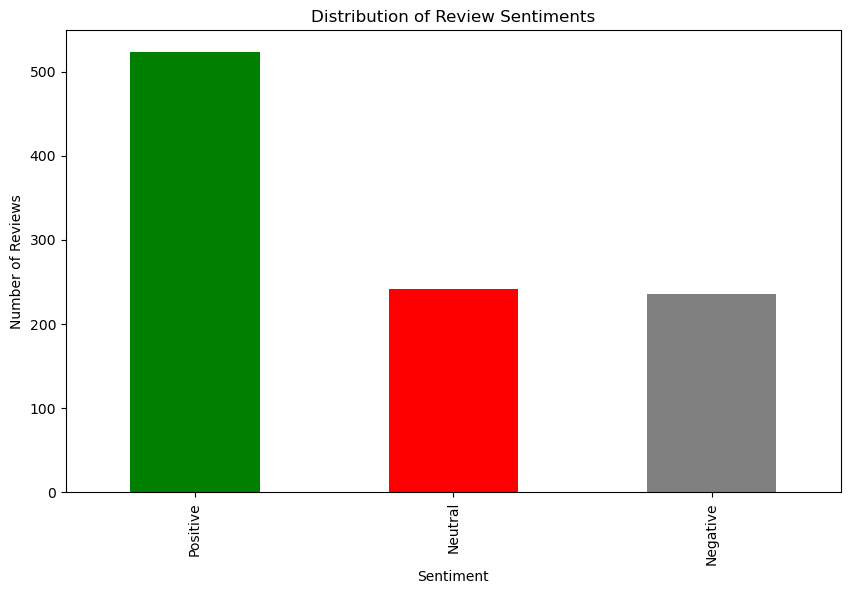

In [18]:
# 3. Perform sentiment analysis
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['polarity'] = reviews_df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df['sentiment'] = reviews_df['polarity'].apply(classify_sentiment)

# 4. Visualize the distribution of sentiments
sentiment_counts = reviews_df['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()




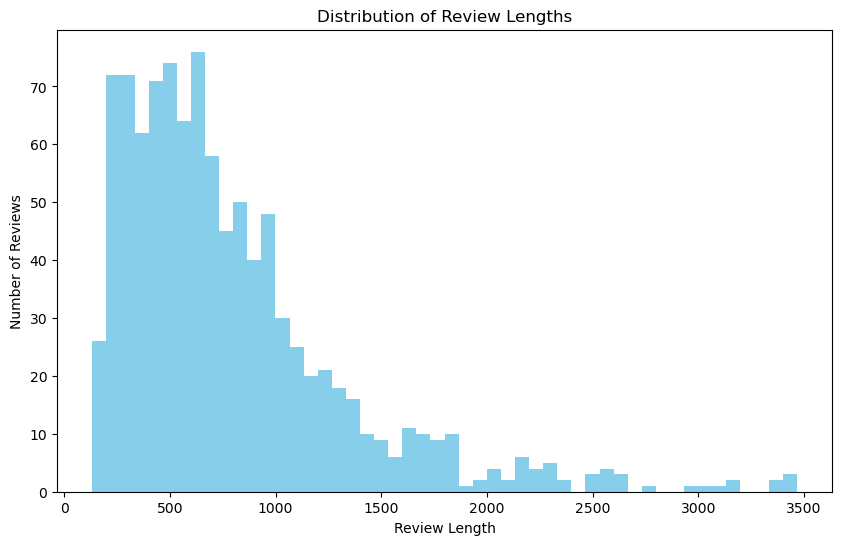

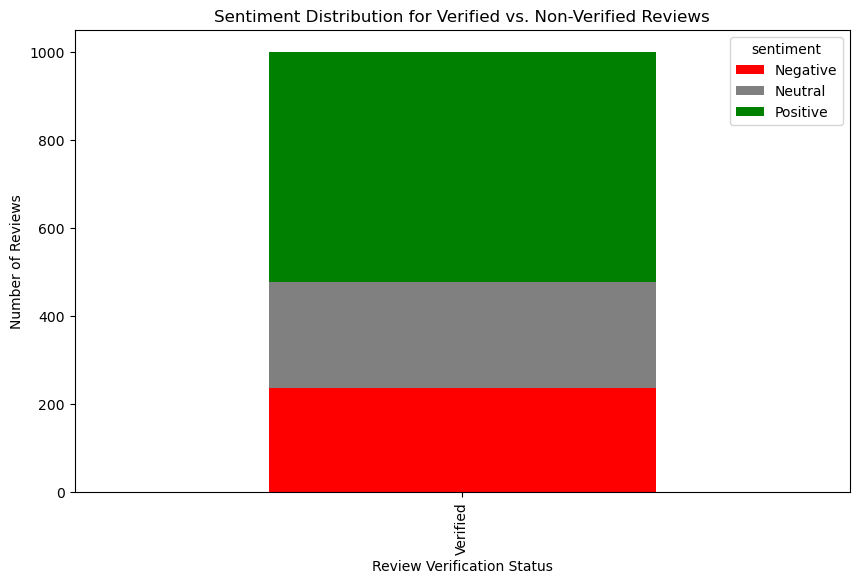

In [29]:
import numpy as np

# 1. Distribution of Review Lengths
reviews_df['review_length'] = reviews_df['cleaned_reviews'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['review_length'], bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

# 2. Sentiment Distribution for Verified vs. Non-Verified Reviews
grouped = reviews_df.groupby(['verified', 'sentiment']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution for Verified vs. Non-Verified Reviews')
plt.xlabel('Review Verification Status')
plt.ylabel('Number of Reviews')
plt.show()



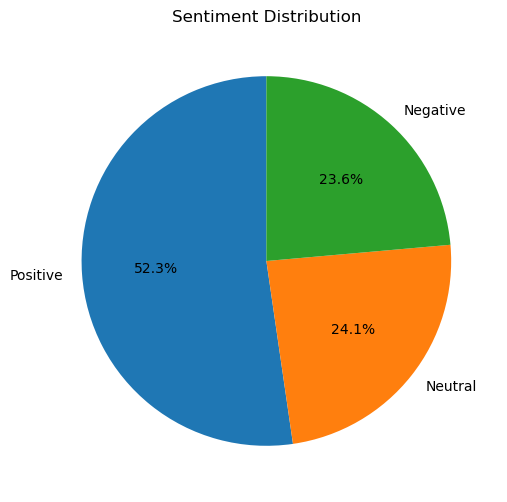

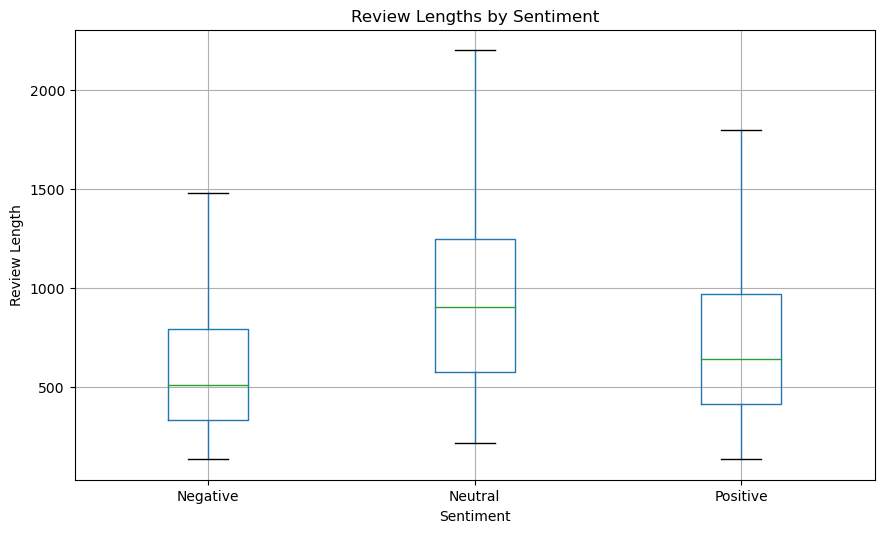

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix



# 1. Pie Chart for Sentiment Distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,6))
plt.title("Sentiment Distribution")
plt.ylabel('')  # This is to remove the 'sentiment' label from the y-axis
plt.show()

# 2. Box plot for review lengths by sentiment
reviews_df.boxplot(column='review_length', by='sentiment', showfliers=False, figsize=(10,6))  # showfliers=False removes outliers
plt.title('Review Lengths by Sentiment')
plt.suptitle('')  # This removes the default title
plt.ylabel('Review Length')
plt.xlabel('Sentiment')
plt.show()



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from textblob import TextBlob



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_df['cleaned_reviews'], reviews_df['sentiment'], test_size=0.2, random_state=42)

# Using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Using Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_vec, y_train)

# Predictions and Evaluation
y_pred = rf_clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.59      0.31      0.41        42
     Neutral       0.40      0.08      0.14        49
    Positive       0.61      0.94      0.74       109

    accuracy                           0.59       200
   macro avg       0.53      0.44      0.43       200
weighted avg       0.55      0.59      0.52       200



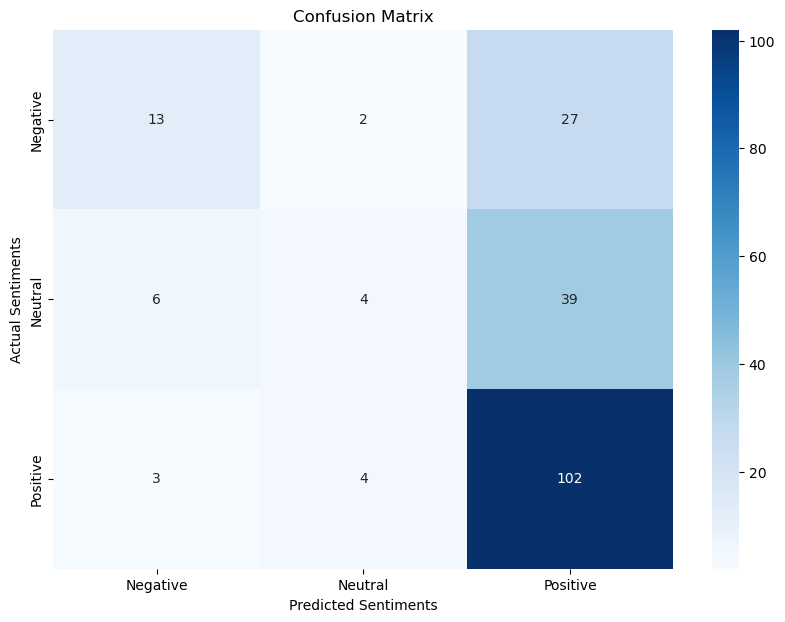

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


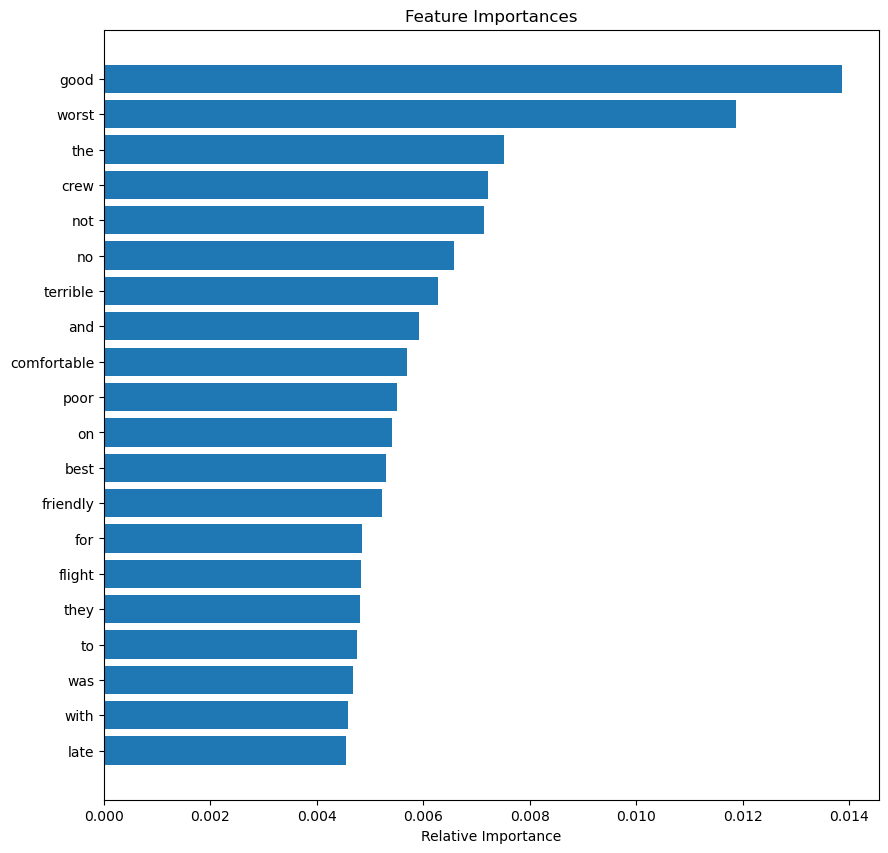

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from textblob import TextBlob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_df['cleaned_reviews'], reviews_df['sentiment'], test_size=0.2, random_state=42)

# Using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Using Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_vec, y_train)

# Predictions
y_pred = rf_clf.predict(X_test_vec)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
feat_importances = rf_clf.feature_importances_
indices = np.argsort(feat_importances)[-20:]  # Top 20 features
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feat_importances[indices], align='center')
plt.yticks(range(len(indices)), [vectorizer.get_feature_names()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


/var/folders/lf/hwptlvxd6vv42x9tfj9kdx800000gn/T/ipykernel_83389/2169667684.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  reviews_df.loc[reviews_df['cleaned_reviews'].str.contains('econom(y|ic)', case=False, regex=True), 'class'] = 'Economic'


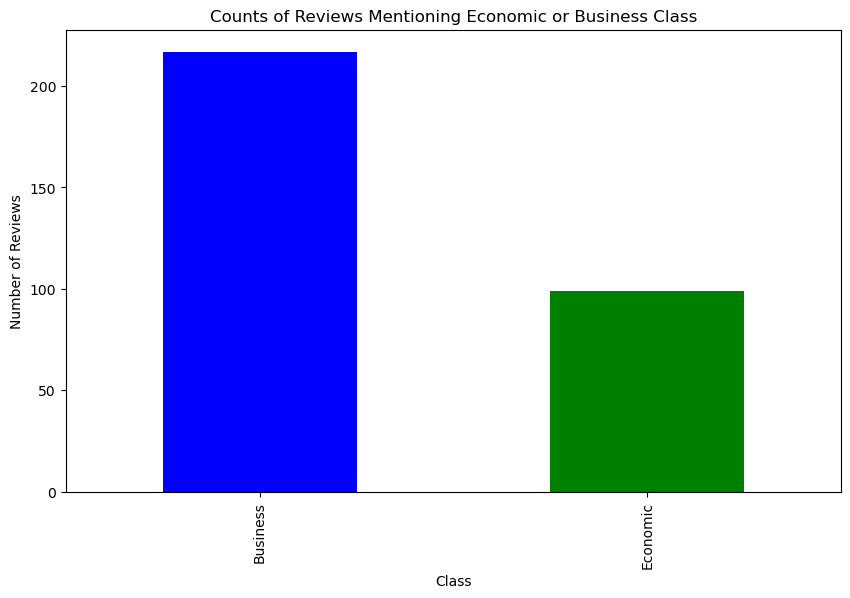

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract Information
reviews_df['class'] = None
reviews_df.loc[reviews_df['cleaned_reviews'].str.contains('econom(y|ic)', case=False, regex=True), 'class'] = 'Economic'
reviews_df.loc[reviews_df['cleaned_reviews'].str.contains('business', case=False), 'class'] = 'Business'

class_counts = reviews_df['class'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Counts of Reviews Mentioning Economic or Business Class')
plt.xlabel('Class')
plt.ylabel('Number of Reviews')
plt.show()


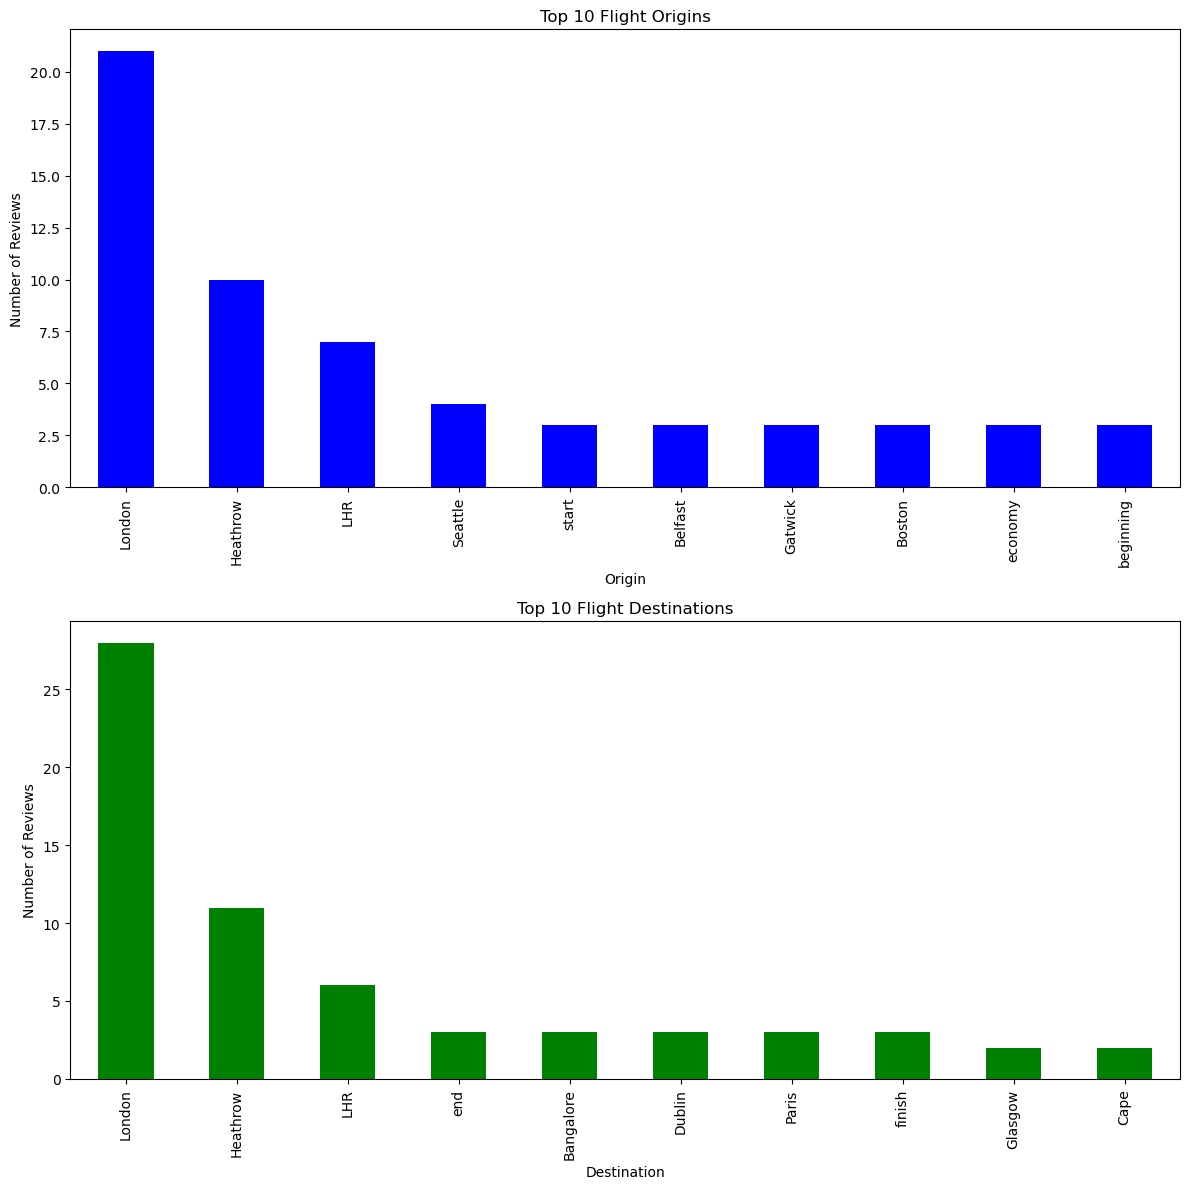

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Extract Information
def extract_flight_info(text):
    match = re.search(r'from (\w+) to (\w+)', text, re.I)
    if match:
        return match.groups()
    return None, None

reviews_df['origin'], reviews_df['destination'] = zip(*reviews_df['cleaned_reviews'].apply(extract_flight_info))
origin_counts = reviews_df['origin'].value_counts().head(10)  # Top 10 origins
destination_counts = reviews_df['destination'].value_counts().head(10)  # Top 10 destinations

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Top origins
origin_counts.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Flight Origins')
axes[0].set_xlabel('Origin')
axes[0].set_ylabel('Number of Reviews')

# Top destinations
destination_counts.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 10 Flight Destinations')
axes[1].set_xlabel('Destination')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


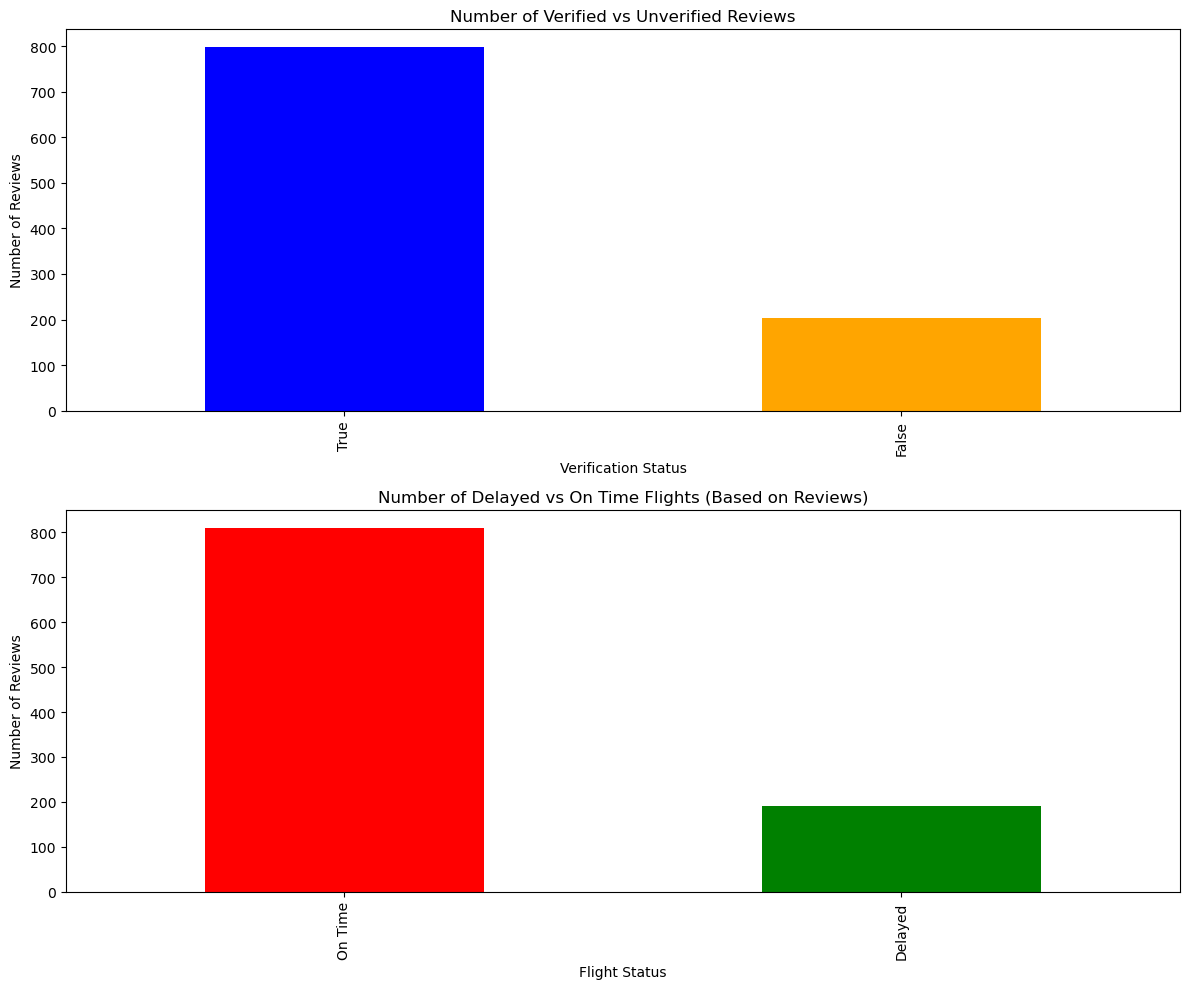

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract Information for verified/unverified flights
reviews_df['verified'] = reviews_df['reviews'].str.contains('✅ Trip Verified', case=False)

# Extract Information for delayed flights
reviews_df['delayed'] = reviews_df['cleaned_reviews'].apply(lambda x: 'Delayed' if 'delay' in x.lower() else 'On Time')

# Counts
verified_counts = reviews_df['verified'].value_counts()
delayed_counts = reviews_df['delayed'].value_counts()

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Verified/Unverified counts
verified_counts.plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Number of Verified vs Unverified Reviews')
axes[0].set_xlabel('Verification Status')
axes[0].set_ylabel('Number of Reviews')

# Delayed/On Time counts
delayed_counts.plot(kind='bar', ax=axes[1], color=['red', 'green'])
axes[1].set_title('Number of Delayed vs On Time Flights (Based on Reviews)')
axes[1].set_xlabel('Flight Status')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


In [ ]:
To determine the factors that influence passengers' decisions to rebook with British Airways, we'd typically look for positive and negative sentiments tied to specific aspects of the airline service. This might include factors like comfort, food, service quality, punctuality, in-flight entertainment, etc.

Let's break the task down:

Keyword Extraction: Identify commonly mentioned factors/aspects in the reviews.
Sentiment Analysis: Determine the sentiment tied to each keyword.
Visualization: Display the aspects that received the most positive and negative sentiments.
Here's a plan:

Create a list of potential keywords (factors/aspects) related to airline service.
For each keyword, extract reviews containing that keyword.
Compute the sentiment of each of these reviews.
Aggregate the sentiments for each keyword.
Visualize the top cherished factors (positive sentiments) and areas for improvement (negative sentiments).

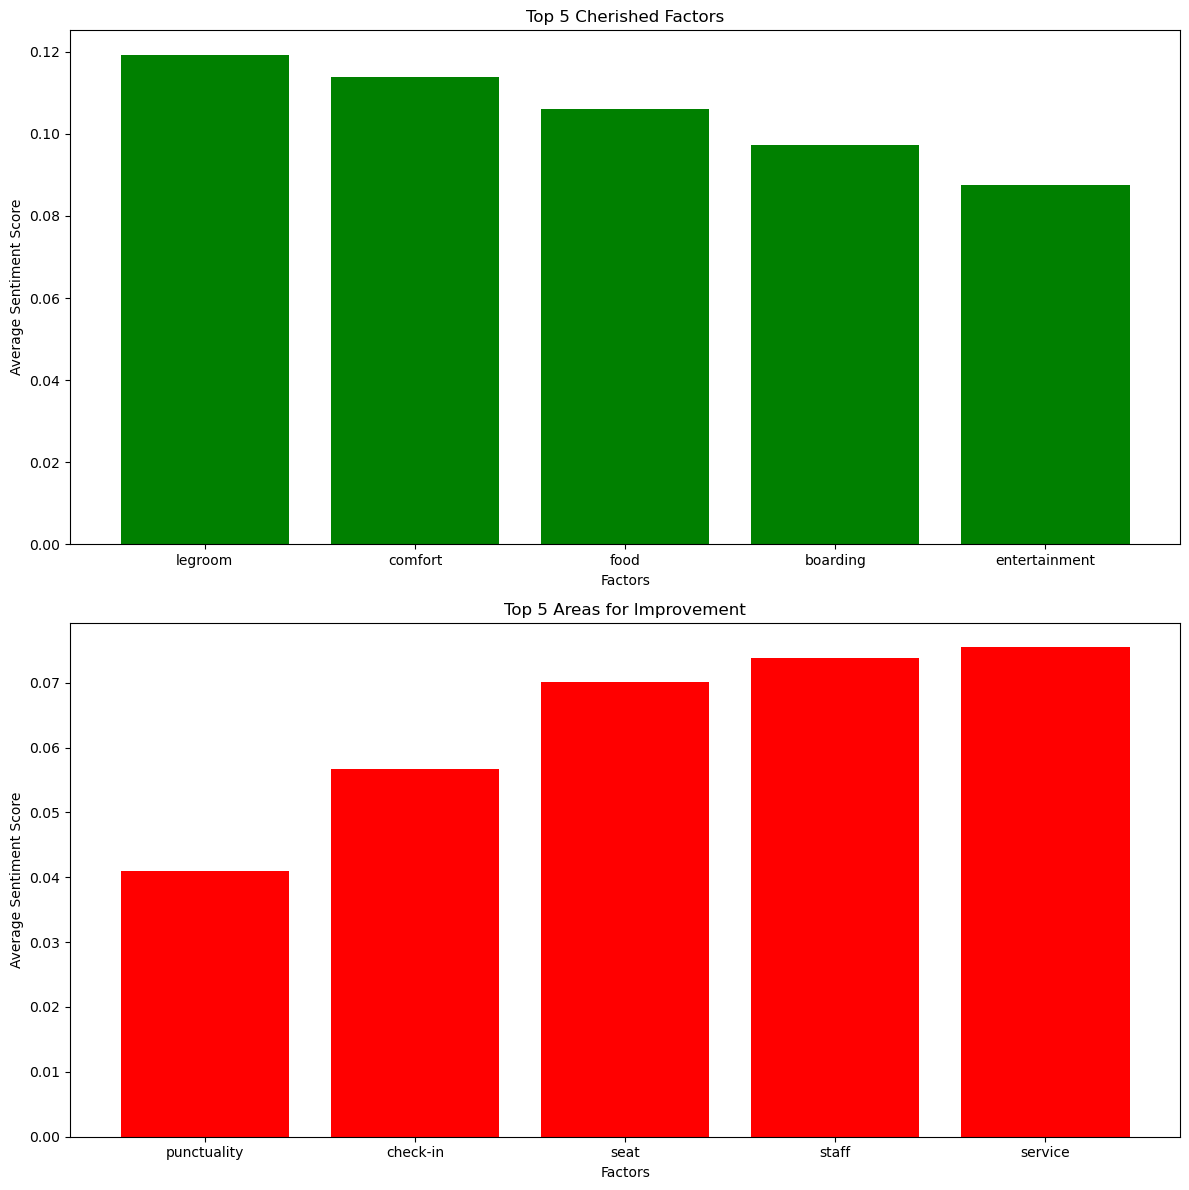

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# 1. Keyword Extraction
keywords = ['seat', 'food', 'service', 'punctuality', 'entertainment', 'staff', 'comfort', 'legroom', 'check-in', 'boarding']

keyword_sentiments = {}

# 2. Sentiment Analysis
for keyword in keywords:
    keyword_reviews = reviews_df[reviews_df['cleaned_reviews'].str.contains(keyword)]
    sentiments = keyword_reviews['cleaned_reviews'].apply(lambda review: TextBlob(review).sentiment.polarity)
    keyword_sentiments[keyword] = sentiments.mean()

# 3. Aggregate and Sort
cherished_factors = sorted(keyword_sentiments.items(), key=lambda x: x[1], reverse=True)
areas_for_improvement = sorted(keyword_sentiments.items(), key=lambda x: x[1])

# 4. Visualization
# Displaying top 5 cherished factors and areas for improvement
top_cherished = dict(cherished_factors[:5])
top_improve = dict(areas_for_improvement[:5])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Cherished factors
axes[0].bar(top_cherished.keys(), top_cherished.values(), color='green')
axes[0].set_title('Top 5 Cherished Factors')
axes[0].set_xlabel('Factors')
axes[0].set_ylabel('Average Sentiment Score')

# Areas for improvement
axes[1].bar(top_improve.keys(), top_improve.values(), color='red')
axes[1].set_title('Top 5 Areas for Improvement')
axes[1].set_xlabel('Factors')
axes[1].set_ylabel('Average Sentiment Score')

plt.tight_layout()
plt.show()
